In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sklearn

In [2]:
print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)

0.23.1
1.18.5
1.0.3


In [3]:
### importing the automobile data
df = pd.read_csv("../input/data-for-reg/auto-mpg.csv")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
193,24.0,6,200.0,81,3012,17.6,76,1,ford maverick
312,37.2,4,86.0,65,2019,16.4,80,3,datsun 310
384,32.0,4,91.0,67,1965,15.7,82,3,honda civic (auto)
333,32.7,6,168.0,132,2910,11.4,80,3,datsun 280-zx
17,21.0,6,200.0,85,2587,16.0,70,1,ford maverick
13,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw)
166,13.0,8,302.0,129,3169,12.0,75,1,ford mustang ii
189,15.5,8,304.0,120,3962,13.9,76,1,amc matador
294,34.1,4,86.0,65,1975,15.2,79,3,maxda glc deluxe
104,12.0,8,400.0,167,4906,12.5,73,1,ford country


In [6]:
df.shape

(398, 9)

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
##replace the missing "?" with the np.nan value
df = df.replace('?',np.nan)
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
df.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [12]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [13]:
## origin and car name has no predictive powed on mpg
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [14]:
df = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year']]

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [16]:
## we make the model year with the age of the car
## prepending 19 so we got the full year
df['model year'] = '19'+df['model year'].astype(str)

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,1970
1,15.0,8,350.0,165,3693,11.5,1970
2,18.0,8,318.0,150,3436,11.0,1970
3,16.0,8,304.0,150,3433,12.0,1970
4,17.0,8,302.0,140,3449,10.5,1970


In [18]:
## now making  an age column based on the model year
current_year         = datetime.datetime.now().year
car_manufacture_year = pd.to_numeric(df['model year'])
df['age'] = current_year - car_manufacture_year

In [19]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
0,18.0,8,307.0,130,3504,12.0,1970,50
1,15.0,8,350.0,165,3693,11.5,1970,50
2,18.0,8,318.0,150,3436,11.0,1970,50
3,16.0,8,304.0,150,3433,12.0,1970,50
4,17.0,8,302.0,140,3449,10.5,1970,50


In [20]:
df = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'age']]

In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,50
1,15.0,8,350.0,165,3693,11.5,50
2,18.0,8,318.0,150,3436,11.0,50
3,16.0,8,304.0,150,3433,12.0,50
4,17.0,8,302.0,140,3449,10.5,50


In [22]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [23]:
## so there is one object field make it numerical
df['horsepower'] = pd.to_numeric(df['horsepower'])

In [24]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
age               int64
dtype: object

In [25]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,50
1,15.0,8,350.0,165,3693,11.5,50
2,18.0,8,318.0,150,3436,11.0,50
3,16.0,8,304.0,150,3433,12.0,50
4,17.0,8,302.0,140,3449,10.5,50


Text(0, 0.5, 'mpg')

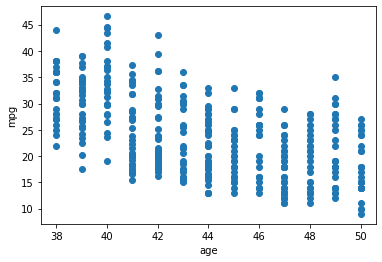

In [26]:
## now we got all the neumeric value
## check the relationship between the age and mpg
plt.scatter(df['age'],df['mpg'])
plt.xlabel('age')
plt.ylabel('mpg')

In [27]:
## so we can see a downward trend that means more the year less 
## mgg and thats ovious during this time engine become advance

Text(0, 0.5, 'mpg')

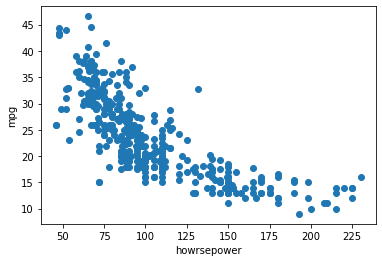

In [28]:
plt.scatter(df['horsepower'],df['mpg'])
plt.xlabel('howrsepower')
plt.ylabel('mpg')

Text(0, 0.5, 'mpg')

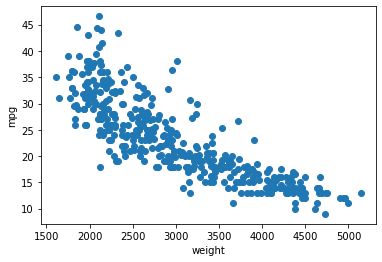

In [29]:
plt.scatter(df['weight'],df['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')

Text(0, 0.5, 'mpg')

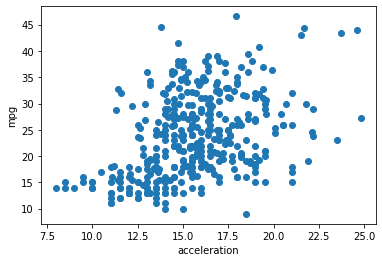

In [30]:
plt.scatter(df['acceleration'],df['mpg'])
plt.xlabel('acceleration')
plt.ylabel('mpg')

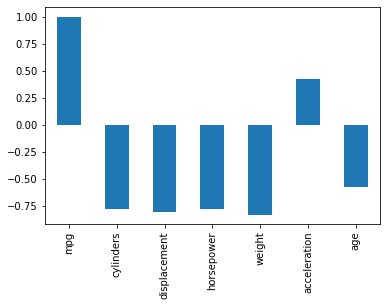

In [31]:
df.corr()['mpg'].plot(kind='bar')

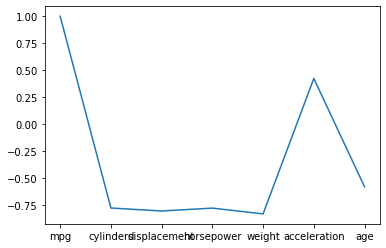

In [32]:
df.corr()['mpg'].plot()

In [33]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


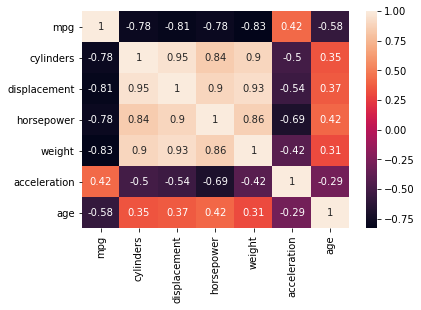

In [34]:
sns.heatmap(df.corr(),annot=True)

In [35]:
df = df.sample(frac=1).reset_index(drop=True)

In [36]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,41.5,4,98.0,76,2144,14.7,40
1,22.0,4,121.0,76,2511,18.0,48
2,14.5,8,351.0,152,4215,12.8,44
3,20.0,4,140.0,90,2408,19.5,48
4,29.5,4,98.0,68,2135,16.6,42


In [37]:
### risk in multiple  regression
## building simple linear regression
data = df.copy()

In [38]:
from sklearn.model_selection import train_test_split
X = data[['horsepower']]
y = data[['mpg']]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [40]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(np.array(x_train),np.array(y_train))

In [41]:
print("Train Score : {}".format(linear_model.score(x_train,y_train)))
print("Test  Score : {}".format(linear_model.score(x_test,y_test)))

Train Score : 0.6089163125124257
Test  Score : 0.588789945218932


In [42]:
y_pred = linear_model.predict(x_test)

In [43]:
from sklearn.metrics import r2_score
print("Testing Score : {}".format(r2_score(y_test,y_pred)))

Testing Score : 0.588789945218932


Text(0, 0.5, 'mpg')

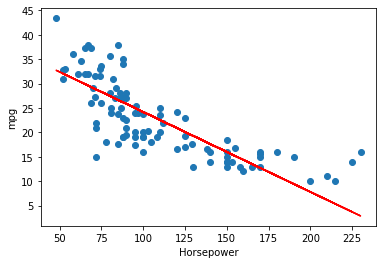

In [44]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')
plt.xlabel("Horsepower")
plt.ylabel('mpg')


Train Score : 0.2858731775285245
Test  Score : 0.4318623580267631
Testing Score : 0.4318623580267631


Text(0, 0.5, 'mpg')

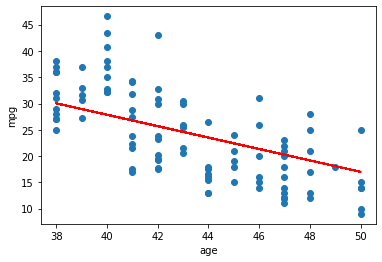

In [45]:
from sklearn.model_selection import train_test_split
X = data[['age']]
y = data[['mpg']]
x_train,x_test,y_train,y_test = train_test_split(X,y)
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(np.array(x_train),np.array(y_train))
print("Train Score : {}".format(linear_model.score(x_train,y_train)))
print("Test  Score : {}".format(linear_model.score(x_test,y_test)))
y_pred = linear_model.predict(x_test)
from sklearn.metrics import r2_score
print("Testing Score : {}".format(r2_score(y_test,y_pred)))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')
plt.xlabel("age")
plt.ylabel('mpg')


Train Score : 0.1924543436088576
Test  Score : 0.10687421830995869
Testing Score : 0.10687421830995869


Text(0, 0.5, 'mpg')

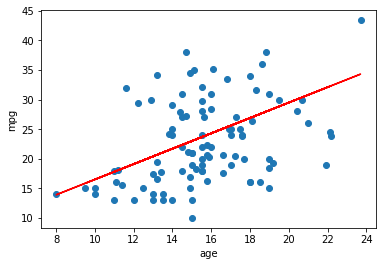

In [46]:
from sklearn.model_selection import train_test_split
X = data[['acceleration']]
y = data[['mpg']]
x_train,x_test,y_train,y_test = train_test_split(X,y)
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(np.array(x_train),np.array(y_train))
print("Train Score : {}".format(linear_model.score(x_train,y_train)))
print("Test  Score : {}".format(linear_model.score(x_test,y_test)))
y_pred = linear_model.predict(x_test)
from sklearn.metrics import r2_score
print("Testing Score : {}".format(r2_score(y_test,y_pred)))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')
plt.xlabel("age")
plt.ylabel('mpg')


In [47]:
from sklearn.model_selection import train_test_split
X = data[['displacement','horsepower','weight']]
y = data[['mpg']]
x_train,x_test,y_train,y_test = train_test_split(X,y)
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(np.array(x_train),np.array(y_train))
print("Train Score : {}".format(linear_model.score(x_train,y_train)))
print("Test  Score : {}".format(linear_model.score(x_test,y_test)))
y_pred = linear_model.predict(x_test)
from sklearn.metrics import r2_score
print("Testing Score : {}".format(r2_score(y_test,y_pred)))
# plt.scatter(x_test,y_test)
# plt.plot(x_test,y_pred,color='r')
# plt.xlabel("age")
# plt.ylabel('mpg')

Train Score : 0.693860224142354
Test  Score : 0.7451924715121139
Testing Score : 0.7451924715121139


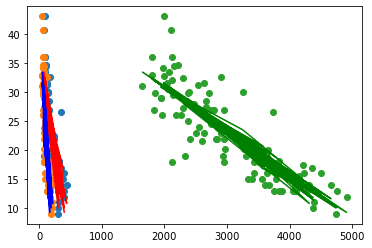

In [48]:
plt.scatter(x_test['displacement'],y_test)
plt.scatter(x_test['horsepower'],y_test)
plt.scatter(x_test['weight'],y_test)
plt.plot(x_test['displacement'],y_pred,color='r')
plt.plot(x_test['horsepower'],y_pred,color='b')
plt.plot(x_test['weight'],y_pred,color='g')


In [49]:
## find the coefficient of the attributes we use
predictors = x_train.columns

In [50]:
coff = pd.Series(linear_model.coef_[0],predictors).sort_values()

In [51]:
coff

horsepower     -0.032240
displacement   -0.006640
weight         -0.005628
dtype: float64

In [52]:
y_pred = linear_model.predict(x_test)

In [53]:
actual = []
for item in y_pred:
    actual.append(item[0])

In [54]:
y_test['predicted'] = np.array(actual)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
r2_score(y_test['mpg'],y_test['predicted'])

0.7451924715121139

# Simpl regression with categorical value

In [57]:
df = pd.read_csv("../input/data-for-reg/exams.csv")

In [58]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,70,76,69
1,female,group C,some college,standard,none,47,52,50
2,male,group E,high school,standard,none,75,72,68
3,female,group B,some college,free/reduced,completed,44,52,54
4,female,group B,bachelor's degree,standard,completed,67,76,80


In [60]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [61]:
d1= {'male':0,'female':1}
df['gender'] = df['gender'].map(d1)


In [62]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group E,associate's degree,standard,none,70,76,69
1,1,group C,some college,standard,none,47,52,50
2,0,group E,high school,standard,none,75,72,68
3,1,group B,some college,free/reduced,completed,44,52,54
4,1,group B,bachelor's degree,standard,completed,67,76,80


In [63]:
df['race/ethnicity'].unique()

array(['group E', 'group C', 'group B', 'group D', 'group A'],
      dtype=object)

In [64]:
d2 = {'group E':0, 'group C':1, 'group B':2, 'group D':3, 'group A':4}

In [65]:
df['race/ethnicity'] = df['race/ethnicity'].map(d2)

In [66]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,associate's degree,standard,none,70,76,69
1,1,1,some college,standard,none,47,52,50
2,0,0,high school,standard,none,75,72,68
3,1,2,some college,free/reduced,completed,44,52,54
4,1,2,bachelor's degree,standard,completed,67,76,80


In [67]:
df['parental level of education'].unique()

array(["associate's degree", 'some college', 'high school',
       "bachelor's degree", 'some high school', "master's degree"],
      dtype=object)

In [68]:
d3 = {"associate's degree":0, 'some college':1, 'high school':2,
       "bachelor's degree":3, 'some high school':4, "master's degree":5}

In [69]:
df['parental level of education'] = df['parental level of education'].map(d3)

In [70]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,0,standard,none,70,76,69
1,1,1,1,standard,none,47,52,50
2,0,0,2,standard,none,75,72,68
3,1,2,1,free/reduced,completed,44,52,54
4,1,2,3,standard,completed,67,76,80


In [71]:
print(df['lunch'].unique())
print(df['test preparation course'].unique())

['standard' 'free/reduced']
['none' 'completed']


In [72]:
d4 = {'standard':0 ,'free/reduced':1}
d5 = {'none':0, 'completed':1}
df['lunch'] = df['lunch'].map(d4)
df['test preparation course'] = df['test preparation course'].map(d5)

In [73]:
df.dtypes

gender                         int64
race/ethnicity                 int64
parental level of education    int64
lunch                          int64
test preparation course        int64
math score                     int64
reading score                  int64
writing score                  int64
dtype: object

In [74]:
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
33,0,3,4,0,0,88,90,88
57,1,3,5,0,0,48,67,64
70,1,1,1,0,0,84,90,92
41,1,3,4,1,0,32,53,45
35,0,3,1,0,1,66,66,69
49,0,3,2,0,1,79,75,78
87,1,1,1,1,0,70,73,77
84,0,3,5,1,0,76,75,72
95,0,1,4,1,0,55,47,39
90,1,0,5,0,0,68,69,69


In [75]:
X = df.drop('math score',axis=1)
y = df[['math score']]

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [78]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 7)
(25, 7)
(75, 1)
(25, 1)


In [80]:
linear_model = LinearRegression(fit_intercept=True).fit(x_train,y_train)

In [81]:
linear_model.score(x_test,y_test)

0.8929070440339952

In [82]:
from sklearn.metrics import r2_score

In [83]:
r2_score(y_test,linear_model.predict(x_test))

0.8929070440339952

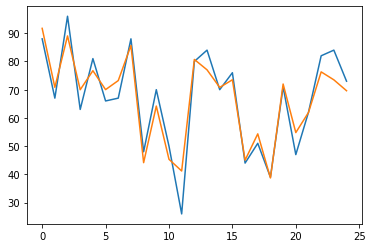

In [86]:
plt.plot(range(len(y_test)),y_test)
plt.plot(range(len(y_test)),linear_model.predict(x_test))

## choosing the right algorithm for the data


1. If you have a few data < 100k and few feature then you choose
        *) lasso  
        *) Elastic Net regression
2. if you have data <100k and lots of feature you choose
        *) Ridge Regression 
        *) SVR(kernel='linear')
   and if does not woek you can also use
        *) SVR(kernel="rbf")
        *) Ensamble Regression
3. if more than 100K then use 
        * SGD model

### Regularaization (adding additional penalty) to deal with the overfitted data elastic regression is the combination of the both they are different based on their penalty score
 


## the penalty of the regression algorithm
1. lasso regression give penalty
    * mse + alpha(|A|+|B|) where alpha is the hyperparameter
2. rdige regression give penalty
    * mse +  alpha(|A|^2+|B|^2)
3. Elast tic net is the
    * mse + alpha(|A|+|B|) + alpha(|A|^2+|B|^2)

In [87]:
### import all kinds of linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,Lars,SGDRegressor

In [88]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [112]:
def model_fc(model,X_train,y_train):
    model.fit(X,y)
    return model

def build_model(model,X_test,y_test):
    model = model
    print("MODEL ACCURACY : {}".format(model.score(X_test,y_test)));
    y_pred = model.predict(X_test)
    plt.plot(range(len(y_pred)),y_pred)
    plt.plot(range(len(y_test)),y_test)
    plt.show()
    

In [126]:
lr = LinearRegression()
las = Lasso()
ri = Ridge()
el = ElasticNet()
la = Lars()
sg = SGDRegressor()
sv = SVR()
kn = KNeighborsRegressor()
dc = DecisionTreeRegressor()
ra = RandomForestRegressor()

In [127]:
models  = { lr : 'LinearRegression',
las : 'Lasso',
ri : 'Ridge',
el : 'ElasticNet',
la : 'Lars',
sg : 'SGDRegressor',
sv : 'SVR',
kn : 'KNeighborsRegressor',
dc : 'DecisionTreeRegressor',
ra : 'RandomForestRegressor'} 

In [128]:
models

{LinearRegression(): 'LinearRegression',
 Lasso(): 'Lasso',
 Ridge(): 'Ridge',
 ElasticNet(): 'ElasticNet',
 Lars(): 'Lars',
 SGDRegressor(): 'SGDRegressor',
 SVR(): 'SVR',
 KNeighborsRegressor(): 'KNeighborsRegressor',
 DecisionTreeRegressor(): 'DecisionTreeRegressor',
 RandomForestRegressor(): 'RandomForestRegressor'}

LinearRegression()
MODEL ACCURACY : 0.9031141112628881


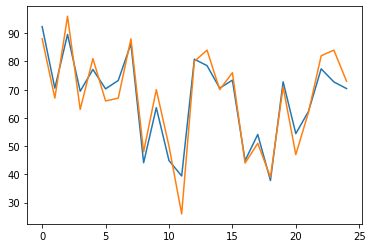

Lasso()
MODEL ACCURACY : 0.8756824006671672


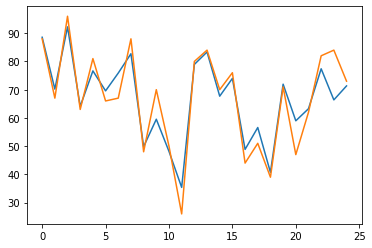

Ridge()
MODEL ACCURACY : 0.9036651219280349


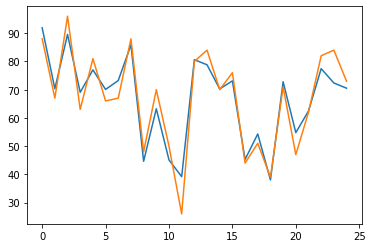

ElasticNet()
MODEL ACCURACY : 0.8301713113037235


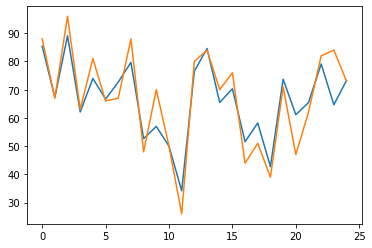

Lars()
MODEL ACCURACY : 0.9031141112628883


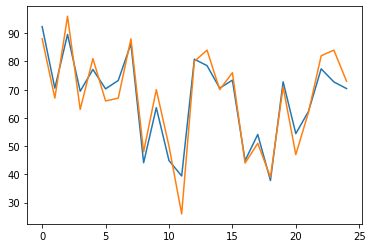

SGDRegressor()
MODEL ACCURACY : -4.306604845030548e+22


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


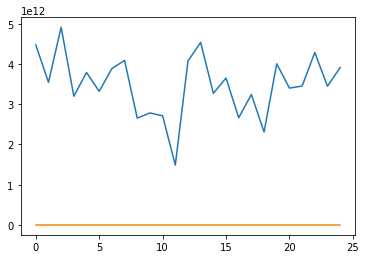

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()
MODEL ACCURACY : 0.3680993198892911


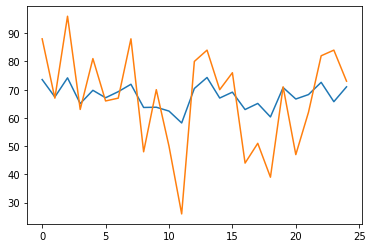

KNeighborsRegressor()
MODEL ACCURACY : 0.8219192181845761


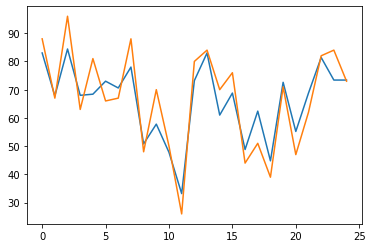

DecisionTreeRegressor()
MODEL ACCURACY : 1.0


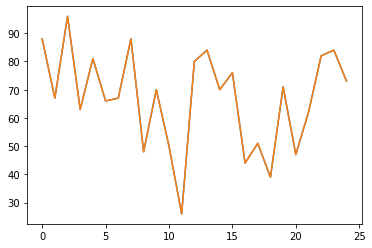

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()
MODEL ACCURACY : 0.9763075039545819


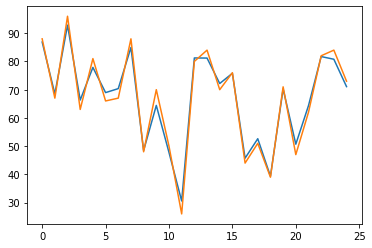

In [129]:
for model in models:
    model = model_fc(model,x_train,y_train)
    print(str(model))
    build_model(model,x_test,y_test)

In [131]:
## Hyparameter tuning
from sklearn.model_selection  import GridSearchCV
parameters = {'alpha':[.2,.4,.6,.7,.8,.9,1]}
grid_search = GridSearchCV(las,parameters,cv=5,return_train_score=True)

In [132]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1]},
             return_train_score=True)

In [133]:
grid_search.best_params_

{'alpha': 0.2}

In [135]:
d = grid_search.best_estimator_

In [136]:
d.fit(x_train,y_train)

Lasso(alpha=0.2)

In [ ]:
d.score(x_test,y_test)